In [1]:
import torch
from CRN import crn_net
model_path = "CP_dir/49.pt"
model = torch.load(model_path).cpu()

In [2]:
import os
import glob
import torchaudio
base_path = r"D:\\work\\speechEnhancement\\datasets\\voicebank_demand"
audio_name = "p232_001.wav"
noisy_audio_path = os.path.join(base_path, "noisy_testset_wav", audio_name)
clean_audio_path = os.path.join(base_path, "clean_testset_wav", audio_name)
noisy_audio, _ = torchaudio.load(noisy_audio_path)
clean_audio, _ = torchaudio.load(clean_audio_path)
noisy_audio = noisy_audio.squeeze(0)
clean_audio = clean_audio.squeeze(0)

In [3]:
from utils import wav2spec, spec2wav

feat_x, phase_x, c, l = wav2spec(noisy_audio)
est_x = model(feat_x.unsqueeze(dim=0)).squeeze(0)
est_wav = spec2wav(est_x, phase_x, c, l)

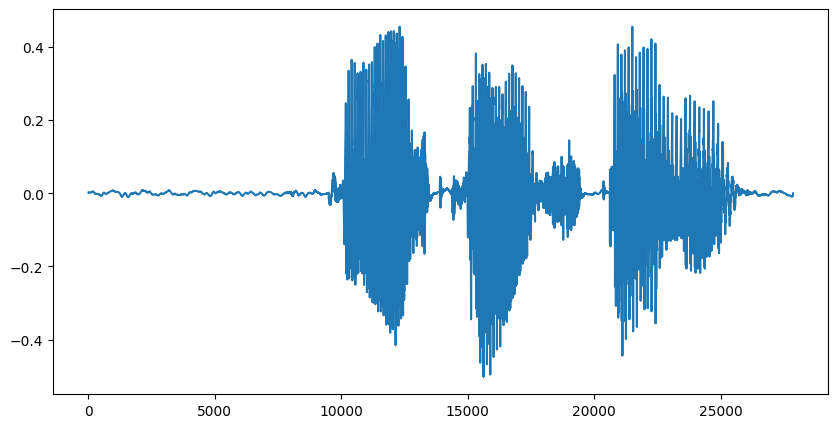

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(clean_audio.numpy())
plt.show()


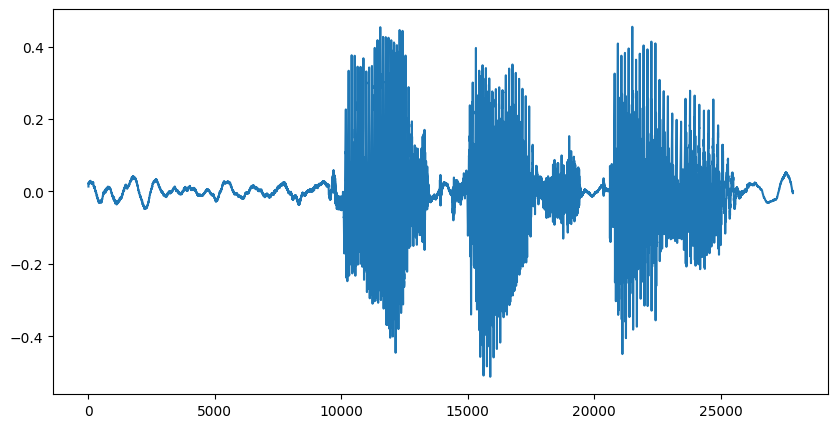

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(noisy_audio.numpy())
plt.show()

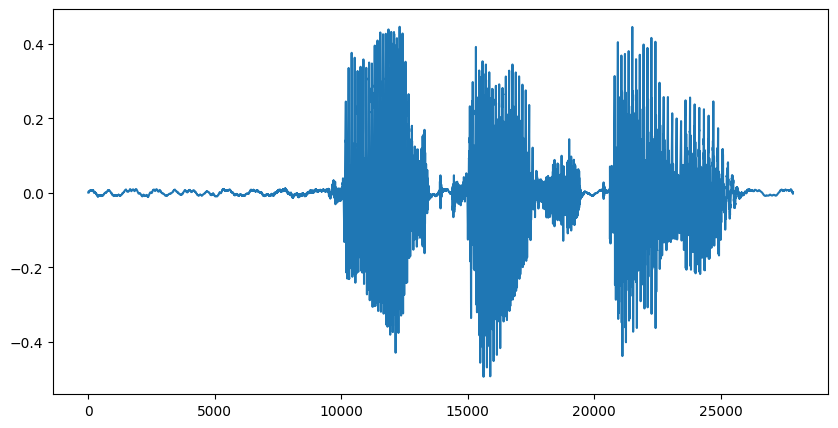

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(est_wav.detach().numpy())
plt.show()

In [18]:
from IPython.display import Audio

Audio(clean_audio.numpy(), rate=16000)

In [20]:
Audio(est_wav.detach().numpy(), rate=16000)

In [21]:
Audio(noisy_audio.numpy(), rate=16000)